# Part 1: Actor/Actress network

In [2]:
library("igraph")
library("hash")
library("e1071")

### Question 2:

In [3]:
g <- read.graph("edge_weight.txt", format="ncol", directed=TRUE)
file_actor_id <- file("actor_id.txt", open="r")
actor_id <- readLines(file_actor_id, encoding="latin1")
close(file_actor_id)

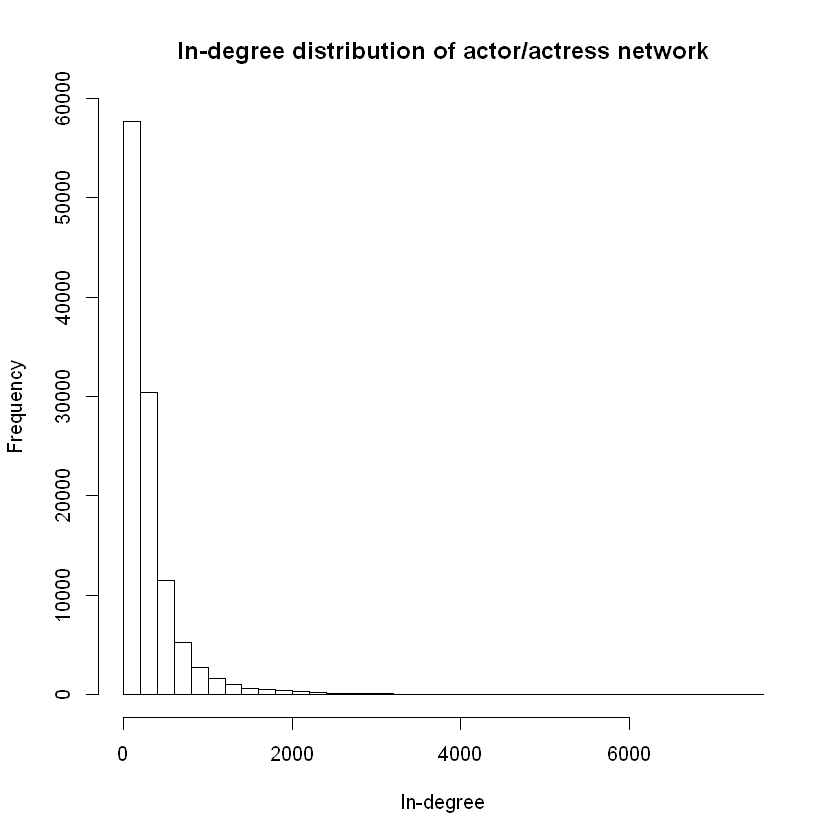

In [4]:
title <- sprintf("In-degree distribution of actor/actress network")
deg_in <- degree(g, mode = c("in"))
hist(deg_in, main=title, xlab="In-degree", breaks=50)

### Question 4:

In [7]:
rank_score <- page.rank(g, algo=c("prpack", "arpack", "power"), directed=TRUE, damping=0.85, weights=NULL)
high_score <- sort(rank_score$vector, decreasing=TRUE)

In [14]:
file_merge <- file("actor_movies_merged.txt", open="r")
actor_movies_merged <- readLines(file_merge, encoding="latin1")
close(file_merge)

In [32]:
for(i in 1:10){
    high_id <- as.numeric(names(high_score[i]))
    high_id <- actor_id[high_id + 1]
    line <- strsplit(high_id, "\t\t")
    
    line_movie <- actor_movies_merged[as.numeric(line[[1]][2]) + 1]
    line_movie <- strsplit(line_movie, "\t\t")
    num_movie <- length(line_movie[[1]]) - 1
    
    deg_in <- degree(g, line[[1]][2], mode=c("in"))
    
    info <- sprintf("%s (ID: %s) has a pagerank score of %f, in-degree of %d, and %d movies\n", line[[1]][1], line[[1]][2], high_score[i], deg_in, num_movie)
    cat(info)
}

Flowers, Bess (ID: 11136) has a pagerank score of 0.000235, in-degree of 7537, and 828 movies
Tatasciore, Fred (ID: 104481) has a pagerank score of 0.000199, in-degree of 3954, and 353 movies
Harris, Sam (II) (ID: 66177) has a pagerank score of 0.000197, in-degree of 6960, and 600 movies
Blum, Steve (IX) (ID: 45073) has a pagerank score of 0.000195, in-degree of 3316, and 373 movies
Miller, Harold (I) (ID: 83949) has a pagerank score of 0.000173, in-degree of 6587, and 561 movies
Jeremy, Ron (ID: 70664) has a pagerank score of 0.000164, in-degree of 3177, and 637 movies
Phelps, Lee (I) (ID: 91318) has a pagerank score of 0.000158, in-degree of 5563, and 647 movies
Lowenthal, Yuri (ID: 78885) has a pagerank score of 0.000157, in-degree of 2662, and 317 movies
Downes, Robin Atkin (ID: 56646) has a pagerank score of 0.000152, in-degree of 2953, and 267 movies
O'Connor, Frank (I) (ID: 88185) has a pagerank score of 0.000147, in-degree of 5502, and 623 movies


### Question 5:

In [44]:
actorID_target <- c(53037, 36700, 51346, 65792, 70923, 55412, 101308, 33234, 55819, 91782)
pagerank_score_target <- c()

for(i in 1:length(high_score)){
    id_cur <- as.numeric(names(high_score[i]))
    if(!is.na(match(id_cur, actorID_target))){
        high_id <- actor_id[id_cur + 1]
        line <- strsplit(high_id, "\t\t")
        
        line_movie <- actor_movies_merged[as.numeric(line[[1]][2]) + 1]
        line_movie <- strsplit(line_movie, "\t\t")
        num_movie <- length(line_movie[[1]]) - 1

        deg_in <- degree(g, line[[1]][2], mode=c("in"))

        info <- sprintf("%s (ID: %s) has a pagerank score of %f, in-degree of %d, and %d movies\n", line[[1]][1], line[[1]][2], high_score[i], deg_in, num_movie)
        cat(info)
    }
}

Depp, Johnny (ID: 55412) has a pagerank score of 0.000054, in-degree of 2144, and 98 movies
Hanks, Tom (ID: 65792) has a pagerank score of 0.000051, in-degree of 2064, and 79 movies
Pitt, Brad (ID: 91782) has a pagerank score of 0.000043, in-degree of 1739, and 71 movies
Johnson, Dwayne (I) (ID: 70923) has a pagerank score of 0.000042, in-degree of 1357, and 78 movies
Clooney, George (ID: 51346) has a pagerank score of 0.000040, in-degree of 1573, and 67 movies
Cruise, Tom (ID: 53037) has a pagerank score of 0.000040, in-degree of 1651, and 63 movies
Streep, Meryl (ID: 33234) has a pagerank score of 0.000040, in-degree of 1594, and 97 movies
Smith, Will (I) (ID: 101308) has a pagerank score of 0.000032, in-degree of 1319, and 49 movies
DiCaprio, Leonardo (ID: 55819) has a pagerank score of 0.000032, in-degree of 1301, and 49 movies
Watson, Emma (II) (ID: 36700) has a pagerank score of 0.000017, in-degree of 453, and 25 movies
